## Image Classification Task- Beginner

In [5]:
pip install tensorflow

## Importing Necessary Libraries

In [6]:
import tensorflow as tf  # Main TensorFlow library
from tensorflow.keras import layers, models  # For building the model
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For plotting
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # For data augmentation


## Data Preparation

In [40]:
# Load and normalize CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

## Normalisation of pixel values

In [41]:
# Normalize the image data to be in the range [0, 1]
X_train, X_test = X_train / 255.0, X_test / 255.0

In [43]:
X_train.shape

(50000, 32, 32, 3)

In [44]:
X_test.shape

(10000, 32, 32, 3)

In [42]:
# Define CIFAR-10 class names
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [54]:
def plot_sample(X_, y_, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X_[index])
    plt.xlabel(classes[y_[index]])

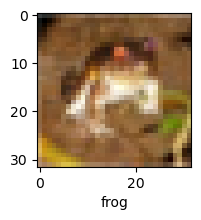

In [55]:
plot_sample(X_train, y_train, 0)

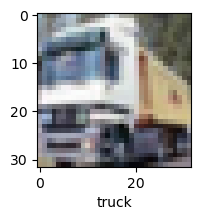

In [56]:
plot_sample(X_train, y_train, 1)

In [46]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [48]:
y_train=y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [49]:
classes[9]

'truck'

## Data Augmentation

In [58]:
datagen = ImageDataGenerator(
    rotation_range=20,  # Randomly rotate images by 20 degrees
    width_shift_range=0.2,  # Randomly shift images horizontally by 20% of the width
    height_shift_range=0.2,  # Randomly shift images vertically by 20% of the height
    horizontal_flip=True  # Randomly flip images horizontally
)

datagen.fit(X_train)  # Fit the data generator to the training data


## Visualising the dataset

In [60]:
augmented_images, augmented_labels = next(datagen.flow(X_train, y_train, batch_size=32))


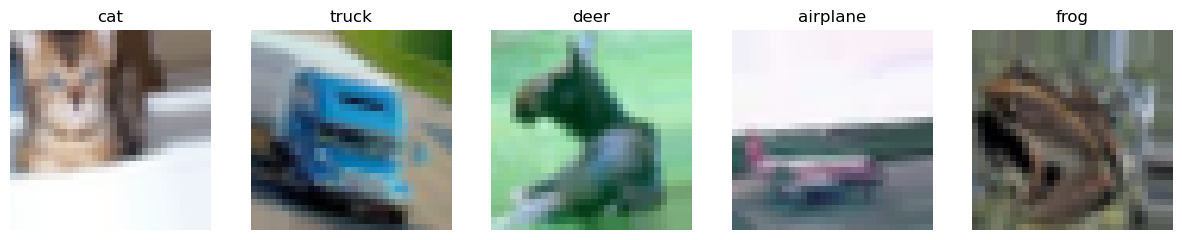

In [61]:
plt.figure(figsize=(15, 6))
for i in range(5):  # Plot first 5 images
    plt.subplot(1, 5, i + 1)
    plt.imshow(augmented_images[i])
    plt.title(classes[augmented_labels[i]])
    plt.axis('off')
plt.show()


## Build the ANN Model for image classification

In [62]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

C:\Users\Lenovo\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 57s 29ms/step - accuracy: 0.3019 - loss: 1.9343
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 47s 30ms/step - accuracy: 0.4191 - loss: 1.6478
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 47s 30ms/step - accuracy: 0.4546 - loss: 1.5505
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 47s 30ms/step - accuracy: 0.4759 - loss: 1.4891
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 47s 30ms/step - accuracy: 0.4950 - loss: 1.4423


313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step


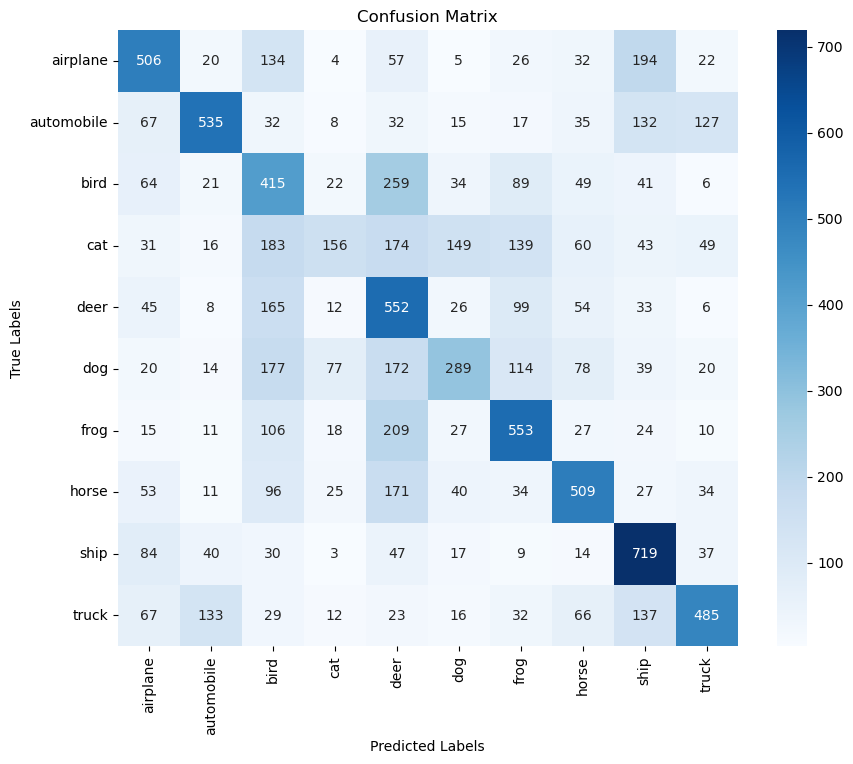

Accuracy: 0.4719
Classification Report: 
               precision    recall  f1-score   support

           0       0.53      0.51      0.52      1000
           1       0.66      0.54      0.59      1000
           2       0.30      0.41      0.35      1000
           3       0.46      0.16      0.23      1000
           4       0.33      0.55      0.41      1000
           5       0.47      0.29      0.36      1000
           6       0.50      0.55      0.52      1000
           7       0.55      0.51      0.53      1000
           8       0.52      0.72      0.60      1000
           9       0.61      0.48      0.54      1000

    accuracy                           0.47     10000
   macro avg       0.49      0.47      0.47     10000
weighted avg       0.49      0.47      0.47     10000



In [65]:
import seaborn as sns
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)
# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
# Calculate the sum of diagonal elements (true positives)
correct_predictions = np.trace(conf_matrix)

# Calculate the total number of predictions
total_predictions = np.sum(conf_matrix)

# Calculate accuracy
accuracy = correct_predictions / total_predictions

# Print the accuracy
print("Accuracy:", accuracy)
print("Classification Report: \n", classification_report(y_test, y_pred_classes))

### Building a CNN Model to classify our images(Given that ANN gave very poor accuracy)

In [67]:
# Define the CNN model
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

## Compile the model

In [68]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Train the model

In [69]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 44s 21ms/step - accuracy: 0.3588 - loss: 1.7587
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 31s 20ms/step - accuracy: 0.5698 - loss: 1.2134
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 30s 19ms/step - accuracy: 0.6355 - loss: 1.0433
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 30s 19ms/step - accuracy: 0.6636 - loss: 0.9659
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 30s 19ms/step - accuracy: 0.6871 - loss: 0.8977
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 30s 19ms/step - accuracy: 0.7096 - loss: 0.8349
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 30s 19ms/step - accuracy: 0.7280 - loss: 0.7884
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 19ms/step - accuracy: 0.7434 - loss: 0.7442
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 30s 19ms/step - accuracy: 0.7489 - loss: 0.7195
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 30s 19ms/step - accuracy: 0.7673 - loss: 0.6716


### With CNN, at the end 5 epochs, accuracy was at around 70% which is a significant improvement over ANN. CNN's are best for image classification and gives superb accuracy. Also computation is much less compared to simple ANN as maxpooling reduces the image dimensions while still preserving the features

In [70]:
cnn.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.7001 - loss: 0.8936


[0.9035312533378601, 0.698199987411499]

In [71]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step


array([[1.13730393e-02, 1.01402763e-03, 1.44740315e-02, 3.83940965e-01,
        6.62142737e-03, 6.87712505e-02, 2.46709004e-01, 2.90732190e-04,
        2.65612245e-01, 1.19335484e-03],
       [3.97566566e-03, 1.88515261e-02, 2.64873652e-05, 8.26710504e-07,
        2.89830979e-07, 1.66980925e-07, 3.08619150e-07, 2.11753061e-07,
        9.76379097e-01, 7.65497214e-04],
       [1.51056498e-01, 1.20944440e-01, 6.17533689e-03, 2.02367827e-02,
        5.80787053e-03, 6.02965709e-03, 2.59509054e-03, 1.49270557e-02,
        6.13490164e-01, 5.87371290e-02],
       [6.89701676e-01, 1.89517334e-01, 1.15031814e-02, 6.06969791e-03,
        1.02322046e-02, 2.80036242e-04, 1.37934461e-03, 1.79711077e-03,
        8.76925439e-02, 1.82679133e-03],
       [2.01337866e-06, 5.38889253e-06, 2.63240654e-03, 3.11196339e-03,
        9.25389901e-02, 6.37866440e-04, 9.01066780e-01, 4.19295930e-07,
        4.08357300e-06, 1.44818472e-07]], dtype=float32)

In [72]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 6]

In [73]:
y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

In [76]:
def plot_sample(X_, y_, index):
    plt.figure(figsize=(15, 2))
    plt.imshow(X_[index])
    plt.xlabel("Class: " + classes[y_[index][0]])  # Extracting the integer value if y_[index] is an array
    plt.show()


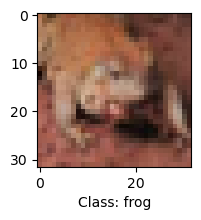

In [80]:
plot_sample(X_test, y_test,5)

In [79]:
classes[y_classes[5]]

'frog'